In [6]:
from standardInclude import *

In [24]:
f = r.TFile("./data/allcalos/results_Run2C_caloPositionHists.root")
#f = r.TFile("./data/allcalos/results_endgame_caloPositionHists.root")
f.cd("verticalPosition")
f.ls()

TFile**		./data/allcalos/results_Run2C_caloPositionHists.root	
 TFile*		./data/allcalos/results_Run2C_caloPositionHists.root	
  KEY: TDirectoryFile	trackCalo;1	trackCalo (TrackCaloMatchingTreeMaker) folder
  KEY: TDirectoryFile	clusters;1	clusters (CaloHitPositions) folder
  KEY: TDirectoryFile	tracks;1	tracks (TrackNTup) folder


Error in <TFile::cd>: Unknown directory verticalPosition


In [25]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] + [1] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

In [26]:
allFitResults = {}
slopes = []
slopeErrs = []
for calo in range(1,25):
    #randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
    randclusters = f.Get("clusters/randclusters"+str(calo)).Clone()
    randclusters.GetYaxis().SetRange(randclusters.GetYaxis().FindBin(1000),randclusters.GetYaxis().FindBin(2400))
    widthDict = getWidths(randclusters.Project3D("zx"), scale=25, offset=3)
    
    tlow = 30
    thigh = 300

    func,paramVec = fitfunc(1, [tlow,thigh]) 

    fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
    allFitResults["calo"+str(calo)] = fitresult
    slopes.append(fitresult.pars[1])
    slopeErrs.append(fitresult.parErrs[1])
    #break

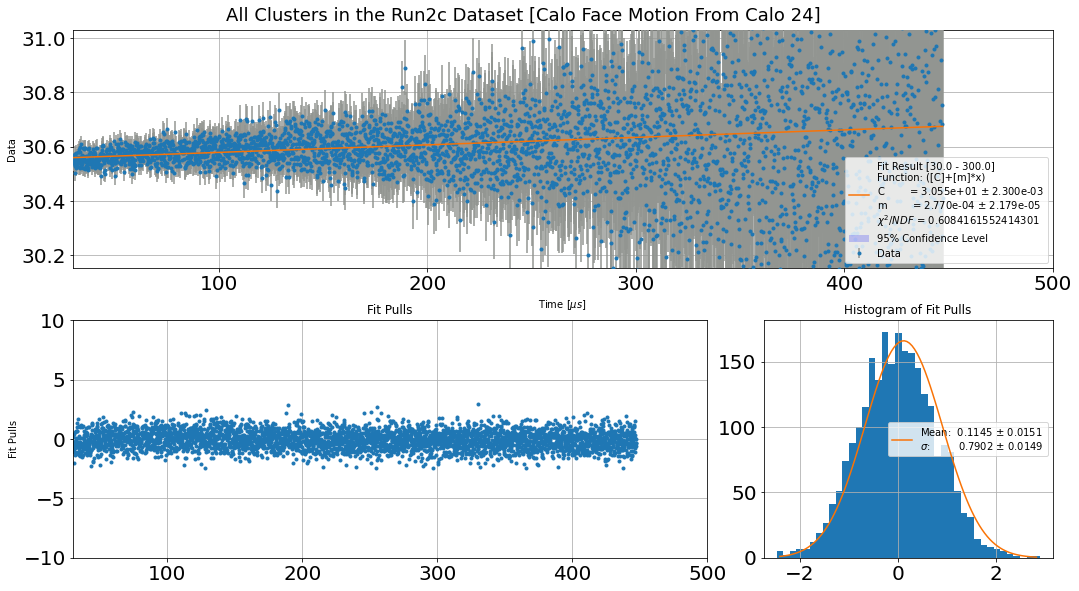

In [21]:
fig,ax = fitresult.draw("All Clusters in the Run2c Dataset [Calo Face Motion From Calo "+str(calo)+"]", 
                        yrange=[None, [-10,10]], fmti=".")
#ax[0].set_ylim(-2,2)
#ax[0].set_xlim(0,50)
for i in range(2):
    ax[i].set_xlim(30,500)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

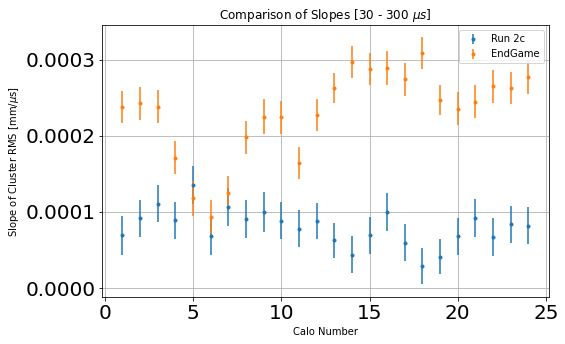

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
plt.errorbar([x for x in range(1,25)], slopes, yerr=slopeErrs, fmt=".",label="Run 2c")
plt.errorbar([x for x in range(1,25)], slopes_eg, yerr=slopeErrs_eg, fmt=".",label="EndGame")
plt.grid()
plt.title(r"Comparison of Slopes [30 - 300 $\mu s$]")
plt.xlabel("Calo Number")
plt.ylabel(r"Slope of Cluster RMS [mm/$\mu$s]")
plt.legend()
plt.show()

In [30]:
np.mean(slopes)

7.95149675658036e-05

In [31]:
np.mean(slopes_eg)

0.00022965667669945324